In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

import sys
sys.path.insert(1, r"C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities")
from classification_tools import plot_confusion_matrix
from misc_tools import percentage_bar_chart

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

https://medium.com/analytics-vidhya/combining-scikit-learn-pipelines-with-catboost-and-dask-part-2-9240242966a7

In [2]:
df_loans = pd.read_excel("Data/CustomerLoans v2.xlsx")
df_loans.head()

,CustomerNumber,CustomerForename,CustomerSurname,CustomerGender,CustomerAccessedAdvice,CustomerPostcode,CustomerAgeAtStart,CustomerJobTitle,CustomerDepartment,CustomerDeprivationDecile,...,EmployerName,EmployerBusinessActivity,EmployerNumberOfEmployees,LoanApplicationMethod,LoanType,LoanStatus,LoanStartMonth,LoanStartYear,LoanExpectedEndYear,LoanActualEndYear
0,29061,Marian,Williams,F,N,CF2 1YJ,52,Higher Education Lecturer,Human Resources,8.0,...,"Wilkinson, Evans and Smith",Healthcare,8000,Online,Bronze,Repaid,12,2016,2018,2018.0
1,81602,Eric,Blackburn,M,N,G93 9NN,31,Engineer (Site),Finance,6.0,...,Evans-Taylor,Electrical Installations,18,In Person,Platinum,Defaulted,9,2017,2021,2018.0
2,24053,Gillian,Curtis,F,N,G1 4PP,36,Warden / Ranger,Human Resources,2.0,...,Williams LLC,"Business, Consulting and Management",1800,Online,Platinum,Repaid,5,2019,2020,2020.0
3,91503,Beverley,Jenkins,F,N,B0H 5RR,51,Dispensing Optician,Human Resources,2.0,...,"Wilkinson, Evans and Smith",Healthcare,8000,Online,Silver,Defaulted,1,2017,2018,2017.0
4,95173,Ashleigh,Jones,F,N,B63 5TW,37,Higher Education Lecturer,Human Resources,10.0,...,Lewis Group,Teaching and Education,738,Online,Bronze,Repaid,9,2016,2017,2017.0


In [3]:
df_loans["LoanStatus"].value_counts()

Repaid       2727
Defaulted    1452
Live         1107
Name: LoanStatus, dtype: int64

In [4]:
df_loans.drop(["CustomerNumber", "CustomerForename", "CustomerSurname", "CustomerPostcode"], axis=1, inplace=True)
df_loans = df_loans.convert_dtypes()
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CustomerGender                    5286 non-null   string
 1   CustomerAccessedAdvice            5286 non-null   string
 2   CustomerAgeAtStart                5286 non-null   Int64 
 3   CustomerJobTitle                  5286 non-null   string
 4   CustomerDepartment                5286 non-null   string
 5   CustomerDeprivationDecile         5260 non-null   Int64 
 6   CustomerIncomeDecile              5260 non-null   Int64 
 7   CustomerEmploymentDecile          5260 non-null   Int64 
 8   CustomerEducationandSkillsDecile  5260 non-null   Int64 
 9   CustomerCrimeDecile               5260 non-null   Int64 
 10  EmployerName                      5286 non-null   string
 11  EmployerBusinessActivity          5286 non-null   string
 12  EmployerNumberOfEmpl

In [5]:
completed_filter = df_loans["LoanStatus"].isin(["Repaid", "Defaulted"])
df_completed = df_loans[completed_filter]
df_live = df_loans[~completed_filter]

df_completed = df_completed.dropna()

In [6]:
df_completed["LoanStatus"].value_counts(normalize=True)

Repaid       0.652069
Defaulted    0.347931
Name: LoanStatus, dtype: Float64

In [7]:
X = df_completed.drop(["LoanStatus"], axis=1)
y = df_completed["LoanStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 3029 to 962
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CustomerGender                    3117 non-null   string
 1   CustomerAccessedAdvice            3117 non-null   string
 2   CustomerAgeAtStart                3117 non-null   Int64 
 3   CustomerJobTitle                  3117 non-null   string
 4   CustomerDepartment                3117 non-null   string
 5   CustomerDeprivationDecile         3117 non-null   Int64 
 6   CustomerIncomeDecile              3117 non-null   Int64 
 7   CustomerEmploymentDecile          3117 non-null   Int64 
 8   CustomerEducationandSkillsDecile  3117 non-null   Int64 
 9   CustomerCrimeDecile               3117 non-null   Int64 
 10  EmployerName                      3117 non-null   string
 11  EmployerBusinessActivity          3117 non-null   string
 12  EmployerNumberOfEm

In [9]:
model = CatBoostClassifier(random_state=42)

In [10]:
categorical_features_indices = np.where(X_train.dtypes == "string")[0]
model.fit(X_train.to_numpy(), y_train.to_numpy(), cat_features=categorical_features_indices, eval_set=(X_test.to_numpy(), y_test.to_numpy()), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.041963
0:	learn: 0.6783899	test: 0.6798932	best: 0.6798932 (0)	total: 184ms	remaining: 3m 4s
1:	learn: 0.6674061	test: 0.6699256	best: 0.6699256 (1)	total: 208ms	remaining: 1m 43s
2:	learn: 0.6574675	test: 0.6611669	best: 0.6611669 (2)	total: 231ms	remaining: 1m 16s
3:	learn: 0.6471842	test: 0.6516790	best: 0.6516790 (3)	total: 252ms	remaining: 1m 2s
4:	learn: 0.6397330	test: 0.6451954	best: 0.6451954 (4)	total: 275ms	remaining: 54.7s
5:	learn: 0.6309201	test: 0.6378552	best: 0.6378552 (5)	total: 295ms	remaining: 48.9s
6:	learn: 0.6224114	test: 0.6295443	best: 0.6295443 (6)	total: 317ms	remaining: 44.9s
7:	learn: 0.6167629	test: 0.6247243	best: 0.6247243 (7)	total: 339ms	remaining: 42s
8:	learn: 0.6075685	test: 0.6165815	best: 0.6165815 (8)	total: 361ms	remaining: 39.8s
9:	learn: 0.5983938	test: 0.6079550	best: 0.6079550 (9)	total: 382ms	remaining: 37.8s
10:	learn: 0.5908820	test: 0.6014018	best: 0.6014018 (10)	total: 405ms	remaining: 36.4s
11:	learn: 0.5855334	t

98:	learn: 0.3928491	test: 0.4337051	best: 0.4337051 (98)	total: 2.48s	remaining: 22.6s
99:	learn: 0.3902200	test: 0.4316370	best: 0.4316370 (99)	total: 2.5s	remaining: 22.5s
100:	learn: 0.3897734	test: 0.4315620	best: 0.4315620 (100)	total: 2.52s	remaining: 22.5s
101:	learn: 0.3890092	test: 0.4311044	best: 0.4311044 (101)	total: 2.54s	remaining: 22.4s
102:	learn: 0.3884343	test: 0.4309262	best: 0.4309262 (102)	total: 2.57s	remaining: 22.4s
103:	learn: 0.3880061	test: 0.4307993	best: 0.4307993 (103)	total: 2.59s	remaining: 22.3s
104:	learn: 0.3875728	test: 0.4308066	best: 0.4307993 (103)	total: 2.61s	remaining: 22.3s
105:	learn: 0.3868599	test: 0.4303338	best: 0.4303338 (105)	total: 2.63s	remaining: 22.2s
106:	learn: 0.3867812	test: 0.4303296	best: 0.4303296 (106)	total: 2.65s	remaining: 22.1s
107:	learn: 0.3860265	test: 0.4300859	best: 0.4300859 (107)	total: 2.67s	remaining: 22.1s
108:	learn: 0.3843965	test: 0.4288477	best: 0.4288477 (108)	total: 2.7s	remaining: 22s
109:	learn: 0.3839

196:	learn: 0.3342660	test: 0.4053596	best: 0.4053596 (196)	total: 4.77s	remaining: 19.4s
197:	learn: 0.3340183	test: 0.4052974	best: 0.4052974 (197)	total: 4.79s	remaining: 19.4s
198:	learn: 0.3337941	test: 0.4050887	best: 0.4050887 (198)	total: 4.82s	remaining: 19.4s
199:	learn: 0.3332636	test: 0.4049923	best: 0.4049923 (199)	total: 4.84s	remaining: 19.3s
200:	learn: 0.3327353	test: 0.4046299	best: 0.4046299 (200)	total: 4.86s	remaining: 19.3s
201:	learn: 0.3321651	test: 0.4040055	best: 0.4040055 (201)	total: 4.89s	remaining: 19.3s
202:	learn: 0.3313939	test: 0.4035903	best: 0.4035903 (202)	total: 4.91s	remaining: 19.3s
203:	learn: 0.3311995	test: 0.4038253	best: 0.4035903 (202)	total: 4.93s	remaining: 19.2s
204:	learn: 0.3309787	test: 0.4038826	best: 0.4035903 (202)	total: 4.95s	remaining: 19.2s
205:	learn: 0.3298468	test: 0.4040514	best: 0.4035903 (202)	total: 4.98s	remaining: 19.2s
206:	learn: 0.3293428	test: 0.4038205	best: 0.4035903 (202)	total: 5s	remaining: 19.2s
207:	learn: 0

294:	learn: 0.2909825	test: 0.3931961	best: 0.3930603 (290)	total: 7.27s	remaining: 17.4s
295:	learn: 0.2908152	test: 0.3932772	best: 0.3930603 (290)	total: 7.3s	remaining: 17.4s
296:	learn: 0.2904784	test: 0.3929629	best: 0.3929629 (296)	total: 7.33s	remaining: 17.4s
297:	learn: 0.2898912	test: 0.3929370	best: 0.3929370 (297)	total: 7.36s	remaining: 17.3s
298:	learn: 0.2896000	test: 0.3928346	best: 0.3928346 (298)	total: 7.39s	remaining: 17.3s
299:	learn: 0.2893983	test: 0.3928255	best: 0.3928255 (299)	total: 7.44s	remaining: 17.4s
300:	learn: 0.2890438	test: 0.3927267	best: 0.3927267 (300)	total: 7.46s	remaining: 17.3s
301:	learn: 0.2887132	test: 0.3925215	best: 0.3925215 (301)	total: 7.5s	remaining: 17.3s
302:	learn: 0.2880135	test: 0.3922639	best: 0.3922639 (302)	total: 7.53s	remaining: 17.3s
303:	learn: 0.2870431	test: 0.3918667	best: 0.3918667 (303)	total: 7.55s	remaining: 17.3s
304:	learn: 0.2867417	test: 0.3919163	best: 0.3918667 (303)	total: 7.58s	remaining: 17.3s
305:	learn: 

389:	learn: 0.2628005	test: 0.3898995	best: 0.3895595 (343)	total: 9.79s	remaining: 15.3s
390:	learn: 0.2626335	test: 0.3896719	best: 0.3895595 (343)	total: 9.81s	remaining: 15.3s
391:	learn: 0.2624152	test: 0.3895661	best: 0.3895595 (343)	total: 9.83s	remaining: 15.3s
392:	learn: 0.2623038	test: 0.3896552	best: 0.3895595 (343)	total: 9.87s	remaining: 15.2s
393:	learn: 0.2620208	test: 0.3898413	best: 0.3895595 (343)	total: 9.89s	remaining: 15.2s
394:	learn: 0.2618231	test: 0.3898089	best: 0.3895595 (343)	total: 9.92s	remaining: 15.2s
395:	learn: 0.2616689	test: 0.3898551	best: 0.3895595 (343)	total: 9.95s	remaining: 15.2s
396:	learn: 0.2614203	test: 0.3897680	best: 0.3895595 (343)	total: 9.97s	remaining: 15.1s
397:	learn: 0.2610113	test: 0.3895509	best: 0.3895509 (397)	total: 10s	remaining: 15.1s
398:	learn: 0.2608415	test: 0.3894313	best: 0.3894313 (398)	total: 10s	remaining: 15.1s
399:	learn: 0.2606562	test: 0.3894687	best: 0.3894313 (398)	total: 10s	remaining: 15.1s
400:	learn: 0.26

485:	learn: 0.2393033	test: 0.3879398	best: 0.3875228 (477)	total: 12.1s	remaining: 12.8s
486:	learn: 0.2391436	test: 0.3880714	best: 0.3875228 (477)	total: 12.1s	remaining: 12.8s
487:	learn: 0.2390479	test: 0.3880258	best: 0.3875228 (477)	total: 12.1s	remaining: 12.7s
488:	learn: 0.2388563	test: 0.3881648	best: 0.3875228 (477)	total: 12.2s	remaining: 12.7s
489:	learn: 0.2388215	test: 0.3881636	best: 0.3875228 (477)	total: 12.2s	remaining: 12.7s
490:	learn: 0.2384776	test: 0.3884155	best: 0.3875228 (477)	total: 12.2s	remaining: 12.7s
491:	learn: 0.2382602	test: 0.3883588	best: 0.3875228 (477)	total: 12.2s	remaining: 12.6s
492:	learn: 0.2379192	test: 0.3884359	best: 0.3875228 (477)	total: 12.3s	remaining: 12.6s
493:	learn: 0.2378377	test: 0.3884849	best: 0.3875228 (477)	total: 12.3s	remaining: 12.6s
494:	learn: 0.2375848	test: 0.3882618	best: 0.3875228 (477)	total: 12.3s	remaining: 12.6s
495:	learn: 0.2374056	test: 0.3882483	best: 0.3875228 (477)	total: 12.3s	remaining: 12.5s
496:	learn

584:	learn: 0.2198092	test: 0.3871527	best: 0.3868766 (569)	total: 14.6s	remaining: 10.3s
585:	learn: 0.2196196	test: 0.3871177	best: 0.3868766 (569)	total: 14.6s	remaining: 10.3s
586:	learn: 0.2194259	test: 0.3869110	best: 0.3868766 (569)	total: 14.6s	remaining: 10.3s
587:	learn: 0.2192403	test: 0.3868626	best: 0.3868626 (587)	total: 14.7s	remaining: 10.3s
588:	learn: 0.2191639	test: 0.3868582	best: 0.3868582 (588)	total: 14.7s	remaining: 10.2s
589:	learn: 0.2190682	test: 0.3868819	best: 0.3868582 (588)	total: 14.7s	remaining: 10.2s
590:	learn: 0.2189152	test: 0.3869427	best: 0.3868582 (588)	total: 14.7s	remaining: 10.2s
591:	learn: 0.2188601	test: 0.3868974	best: 0.3868582 (588)	total: 14.8s	remaining: 10.2s
592:	learn: 0.2187424	test: 0.3868717	best: 0.3868582 (588)	total: 14.8s	remaining: 10.1s
593:	learn: 0.2183602	test: 0.3866376	best: 0.3866376 (593)	total: 14.8s	remaining: 10.1s
594:	learn: 0.2182493	test: 0.3867672	best: 0.3866376 (593)	total: 14.8s	remaining: 10.1s
595:	learn

679:	learn: 0.2021036	test: 0.3854872	best: 0.3851432 (664)	total: 17s	remaining: 7.99s
680:	learn: 0.2019401	test: 0.3854223	best: 0.3851432 (664)	total: 17s	remaining: 7.97s
681:	learn: 0.2015694	test: 0.3851352	best: 0.3851352 (681)	total: 17s	remaining: 7.94s
682:	learn: 0.2014835	test: 0.3850223	best: 0.3850223 (682)	total: 17.1s	remaining: 7.92s
683:	learn: 0.2013237	test: 0.3851109	best: 0.3850223 (682)	total: 17.1s	remaining: 7.89s
684:	learn: 0.2011901	test: 0.3850485	best: 0.3850223 (682)	total: 17.1s	remaining: 7.87s
685:	learn: 0.2009204	test: 0.3851073	best: 0.3850223 (682)	total: 17.1s	remaining: 7.84s
686:	learn: 0.2008091	test: 0.3852291	best: 0.3850223 (682)	total: 17.2s	remaining: 7.82s
687:	learn: 0.2006099	test: 0.3852047	best: 0.3850223 (682)	total: 17.2s	remaining: 7.8s
688:	learn: 0.2003933	test: 0.3852367	best: 0.3850223 (682)	total: 17.2s	remaining: 7.77s
689:	learn: 0.2001916	test: 0.3851234	best: 0.3850223 (682)	total: 17.2s	remaining: 7.75s
690:	learn: 0.199

777:	learn: 0.1852103	test: 0.3853182	best: 0.3848519 (725)	total: 19.5s	remaining: 5.55s
778:	learn: 0.1851468	test: 0.3852477	best: 0.3848519 (725)	total: 19.5s	remaining: 5.53s
779:	learn: 0.1849596	test: 0.3851071	best: 0.3848519 (725)	total: 19.5s	remaining: 5.5s
780:	learn: 0.1847894	test: 0.3852060	best: 0.3848519 (725)	total: 19.5s	remaining: 5.48s
781:	learn: 0.1845289	test: 0.3851862	best: 0.3848519 (725)	total: 19.6s	remaining: 5.45s
782:	learn: 0.1842830	test: 0.3853722	best: 0.3848519 (725)	total: 19.6s	remaining: 5.43s
783:	learn: 0.1839079	test: 0.3855365	best: 0.3848519 (725)	total: 19.6s	remaining: 5.4s
784:	learn: 0.1837751	test: 0.3855338	best: 0.3848519 (725)	total: 19.6s	remaining: 5.38s
785:	learn: 0.1837205	test: 0.3856063	best: 0.3848519 (725)	total: 19.7s	remaining: 5.35s
786:	learn: 0.1835576	test: 0.3855135	best: 0.3848519 (725)	total: 19.7s	remaining: 5.33s
787:	learn: 0.1833893	test: 0.3856630	best: 0.3848519 (725)	total: 19.7s	remaining: 5.3s
788:	learn: 0

876:	learn: 0.1698571	test: 0.3867804	best: 0.3848519 (725)	total: 22s	remaining: 3.08s
877:	learn: 0.1698265	test: 0.3868628	best: 0.3848519 (725)	total: 22s	remaining: 3.06s
878:	learn: 0.1697008	test: 0.3869774	best: 0.3848519 (725)	total: 22s	remaining: 3.04s
879:	learn: 0.1694984	test: 0.3869387	best: 0.3848519 (725)	total: 22.1s	remaining: 3.01s
880:	learn: 0.1693513	test: 0.3868877	best: 0.3848519 (725)	total: 22.1s	remaining: 2.98s
881:	learn: 0.1692228	test: 0.3870042	best: 0.3848519 (725)	total: 22.1s	remaining: 2.96s
882:	learn: 0.1689228	test: 0.3870526	best: 0.3848519 (725)	total: 22.1s	remaining: 2.93s
883:	learn: 0.1687127	test: 0.3869475	best: 0.3848519 (725)	total: 22.2s	remaining: 2.91s
884:	learn: 0.1685181	test: 0.3870379	best: 0.3848519 (725)	total: 22.2s	remaining: 2.88s
885:	learn: 0.1684161	test: 0.3869511	best: 0.3848519 (725)	total: 22.2s	remaining: 2.86s
886:	learn: 0.1682064	test: 0.3869844	best: 0.3848519 (725)	total: 22.2s	remaining: 2.83s
887:	learn: 0.16

975:	learn: 0.1568991	test: 0.3888367	best: 0.3848519 (725)	total: 24.5s	remaining: 602ms
976:	learn: 0.1568683	test: 0.3888177	best: 0.3848519 (725)	total: 24.5s	remaining: 577ms
977:	learn: 0.1567306	test: 0.3888258	best: 0.3848519 (725)	total: 24.5s	remaining: 551ms
978:	learn: 0.1566298	test: 0.3887280	best: 0.3848519 (725)	total: 24.5s	remaining: 526ms
979:	learn: 0.1564698	test: 0.3886352	best: 0.3848519 (725)	total: 24.6s	remaining: 501ms
980:	learn: 0.1563121	test: 0.3885181	best: 0.3848519 (725)	total: 24.6s	remaining: 476ms
981:	learn: 0.1561894	test: 0.3885906	best: 0.3848519 (725)	total: 24.6s	remaining: 451ms
982:	learn: 0.1560199	test: 0.3885876	best: 0.3848519 (725)	total: 24.6s	remaining: 426ms
983:	learn: 0.1559658	test: 0.3885063	best: 0.3848519 (725)	total: 24.6s	remaining: 401ms
984:	learn: 0.1557882	test: 0.3885224	best: 0.3848519 (725)	total: 24.7s	remaining: 376ms
985:	learn: 0.1556910	test: 0.3884306	best: 0.3848519 (725)	total: 24.7s	remaining: 351ms
986:	learn

In [11]:
y_test_pred = model.predict(X_test.to_numpy())
y_test_pred

array(['Defaulted', 'Repaid', 'Repaid', ..., 'Repaid', 'Repaid', 'Repaid'],
      dtype=object)

In [12]:
accuracy_score(y_test, y_test_pred)

0.8479307025986526

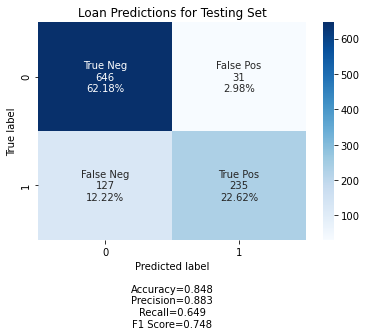

In [13]:
plot_confusion_matrix(y_test, y_test_pred, title=f"Loan Predictions for Testing Set", labels=["Repaid", "Defaulted"], cmap="Blues")

In [14]:
y_train

3029       Repaid
4799       Repaid
4840    Defaulted
2664    Defaulted
181        Repaid
          ...    
4561       Repaid
529        Repaid
3793    Defaulted
4894    Defaulted
962     Defaulted
Name: LoanStatus, Length: 3117, dtype: string

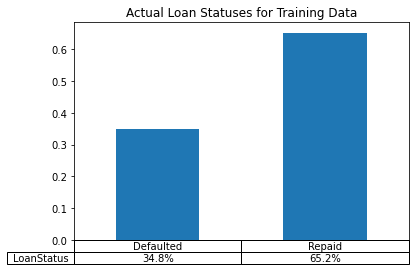

In [15]:
percentage_bar_chart(y_train, title="Actual Loan Statuses for Training Data")

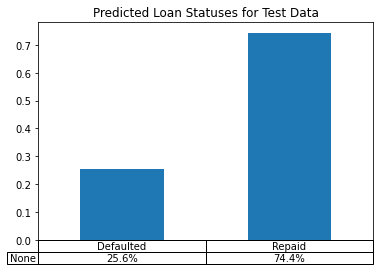

In [16]:
percentage_bar_chart(pd.Series(y_test_pred), title="Predicted Loan Statuses for Test Data")

In [17]:
df_live = df_live.drop("LoanStatus", axis=1)
df_live = df_live.dropna()

In [18]:
y_live_pred = model.predict(df_live.to_numpy())

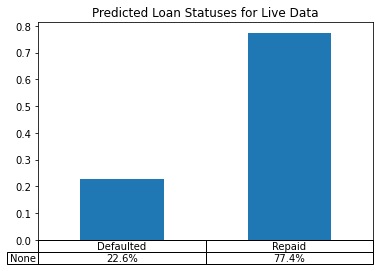

In [19]:
percentage_bar_chart(pd.Series(y_live_pred), title="Predicted Loan Statuses for Live Data")

In [21]:
df_live["LoanType"].value_counts(normalize=True)

Platinum    1.0
Name: LoanType, dtype: Float64